In [1]:
%load_ext autoreload
%autoreload 2
# add path to code
import sys
sys.path.insert(0, '../source')

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 
from params import rho_i, rho_w, g, L, G, nu, Lh,omega,A,n

In [3]:
q_in = 1e-1
Lc = L
Area = 1e3 ** 2
grad_h_basic = 0.01 #mean of grad[z_b + (rho_i/rho_w)*(z_s-z_b)]

In [4]:
def grad_h(N):
    # hydraulic head as a function of effective pressure N, 
    # bed elevation z_b, and surface elevation z_s
    return grad_h_basic - N/(rho_w*g*Lc)

def Q(b,N):
    # water discharge as a function of gap height b,
    # hydraulic head h, assuming turbulent regime
    p1 = (np.abs(b)**3)*g*grad_h(N)
    p2 = 12*omega
    return np.sqrt(np.abs(p1))*np.sign(grad_h(N))/np.sqrt(p2)

def M(q,N):
    # melting term
    p = G + rho_w*g*q*grad_h(N)
    return p/Lh

def C(b,N):
    # viscous closure term
    return 1e4*A*b*N*np.abs(N)**(n-1)

In [5]:
def lake_rhs(t, z):
    b, N = z
    q = Q(b,N)
    dbdt = M(q,N)/rho_i - C(b,N)
    dNdt = (rho_w*g/Area)*(q - q_in)
    return [dbdt, dNdt]

In [6]:
t_max = 10*3.154e7
sol = solve_ivp(lake_rhs, [0, t_max], [0.01, 0], args=(), dense_output=True,method='DOP853')

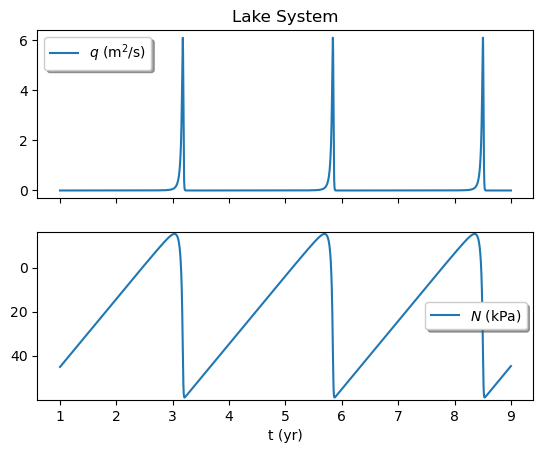

In [7]:
t = np.linspace(0.1*t_max, 0.9*t_max, 10000)
z = sol.sol(t)

b,N = z

q = Q(b,N)

plt.subplot(211)
plt.plot(t/3.154e7, q)
plt.legend([r'$q$ (m$^2$/s)'], shadow=True)
plt.title('Lake System')
plt.gca().xaxis.set_ticklabels([])

plt.subplot(212)
plt.plot(t/3.154e7, N/1e3)
plt.ylim(N.max()/1e3+1,N.min()/1e3-1)
plt.xlabel('t (yr)')
plt.legend([r'$N$ (kPa)'], shadow=True)
plt.show()
plt.close()